# **Ataque de tiburones**


###****¡Bienvenido a la misión de manipulación de datos! Tu misión: limpiar un conjunto de datos desordenado conocido como " ataques de tiburones " mediante el uso de técnicas de manipulación de datos. Al hacerlo, podrás preparar el conjunto de datos para el análisis de un caso de uso de tu elección. Durante esta misión, mejorarás tus habilidades de Python, darás los siguientes pasos para convertirte en analista de datos, mejorarás el trabajo en equipo y desarrollarás tus habilidades de resolución de problemas. ¿Listo? ¡Vamos!

###-En primer lugar, examinará el conjunto de datos sobre ataques de tiburones , comprenderá su estructura y formulará una o varias hipótesis sobre los datos. Por ejemplo, podría plantear la hipótesis de que los ataques de tiburones son más comunes en determinadas ubicaciones geográficas o entre personas que realizan determinadas actividades.

####-Tareas y temas clave del equipo de desarrollo:

#####+1- Descargue el conjunto de datos e impórtelo a Python.
#####+2-Examine los datos e intente comprender qué significan los campos antes de continuar con la limpieza y manipulación de datos.
#####+3-Analizar la estructura y la calidad de un conjunto de datos, identificar posibles problemas y desarrollar un plan para limpiar y transformar los datos.
#####+4-Limpia y formatea todo excepto las fechas.
#####+5-Aplicar al menos cinco técnicas de limpieza de datos, como manejar valores nulos, eliminar columnas, eliminar datos duplicados, manipular cadenas, formatear los datos, etc., para preparar el conjunto de datos para el análisis.
#####+6-Terminar de limpiar y formatear los datos.
#####+7-Estructurar los datos para que sean adecuados para el análisis. Esto puede implicar la creación de nuevos campos, la agrupación de datos o la creación de tablas dinámicas.
#####+8-Utilice técnicas de agregación y filtrado para refinar aún más el conjunto de datos y comenzar a sacar conclusiones sobre sus hipótesis.
#####+9-Finalizar todas las tareas de limpieza, transformación y análisis.
#####+10-Termine de realizar el EDA y utilice los conocimientos adquiridos para validar o refutar las hipótesis iniciales.
#####+11-Termine de refinar su código de acuerdo con las mejores prácticas.
#####+12-Prepare una presentación visualmente atractiva con un texto mínimo para comunicar eficazmente las ideas y conclusiones a las partes interesadas. Asegúrese de crear una narrativa convincente que destaque la importancia de su análisis****

In [1]:
# Pasos a seguir:
# Importamos las librerias necesarias
# Cargamos Los datos

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
! pip install xlrd

In [4]:
df=pd.read_excel("GSAF5.xls")

In [28]:
# Para tener una primera visualización, utilizamos nuestra función bienvenida, número de columnas, y las 5 primeras y últimas columnas a modo de ejemplo.

In [5]:
def bienvenida(df):
    print(df.shape)
    print(df.head())
    print(df.tail())

In [6]:
# Ahora utilizaremos una función para una visión más completa de nuestros datos

In [6]:
def vision_completa(df):
    print(df.info())
    print(df.describe().T)
    print(df.describe(include='object').T)

In [7]:
vision_completa(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6994 entries, 0 to 6993
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6994 non-null   object 
 1   Year            6992 non-null   float64
 2   Type            6976 non-null   object 
 3   Country         6944 non-null   object 
 4   State           6511 non-null   object 
 5   Location        6429 non-null   object 
 6   Activity        6409 non-null   object 
 7   Name            6775 non-null   object 
 8   Sex             6415 non-null   object 
 9   Age             4000 non-null   object 
 10  Injury          6959 non-null   object 
 11  Fatal Y/N       6433 non-null   object 
 12  Time            3468 non-null   object 
 13  Species         3862 non-null   object 
 14  Source          6975 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [32]:
# Verificamos valores nulos o duplicados

In [8]:
def verificar_nulos(df):
    print(df.isnull().sum())

def verificar_duplicados(df):
    print(f'número de filas duplicadas: {df.duplicated().sum()}')
    print('\nfilas duplicadas:')
    print(df[df.duplicated()])
    

In [34]:
# Aplicamos el porcentaje en nuestros valores nulos, para con que columnas podemos trabajar y cuales hay que limpiar, o simplemente desechamos

In [9]:
nulos = df.isnull().sum()
porcentajes = (df.isnull().sum() / len(df)) * 100

resumen_nulos = pd.DataFrame({'Nulos': nulos, 'Porcentaje': porcentajes})
print(resumen_nulos)

                Nulos  Porcentaje
Date                0    0.000000
Year                2    0.028596
Type               18    0.257363
Country            50    0.714898
State             483    6.905919
Location          565    8.078353
Activity          585    8.364312
Name              219    3.131255
Sex               579    8.278524
Age              2994   42.808121
Injury             35    0.500429
Fatal Y/N         561    8.021161
Time             3526   50.414641
Species          3132   44.781241
Source             19    0.271661
pdf               195    2.788104
href formula      200    2.859594
href              198    2.830998
Case Number       196    2.802402
Case Number.1     197    2.816700
original order    195    2.788104
Unnamed: 21      6993   99.985702
Unnamed: 22      6992   99.971404


In [36]:
#Aquí podemos observar que hay columnas que por su elevado porcentaje de nulos, no nos van a servir, sobre todo para nuestro análisis especifico
#como son por ejemplo, los nombres de las personas atacadas.
#En este caso podemos eliminar esa columna, porque su información no es relevante.
#Borramos columnas imnecesarias para nuestro análisis.

In [10]:
df.drop('Case Number', axis=1, inplace=True)
df.drop('Case Number.1', axis=1, inplace=True)
df.drop('Unnamed: 21', axis=1, inplace=True)
df.drop('original order', axis=1, inplace=True)
df.drop('Unnamed: 22', axis=1, inplace=True)
df.drop('href formula', axis=1, inplace=True)
df.drop('href', axis=1, inplace=True)
df.drop('pdf', axis=1, inplace=True)
df.drop('Year', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Source', axis=1, inplace=True)

In [38]:
# Veamos como queda después del los primero cambios.

In [12]:
df.shape

(6994, 12)

In [40]:
# Podemos observar, un nivel de datos y columnas mucho más manejable y acorde a nuestro objetivo final.

In [13]:
df.describe().T
df.describe(include='object').T

,count,unique,top,freq
Date,6994,6042,1957,9
Type,6976,12,Unprovoked,5155
Country,6944,239,USA,2556
State,6511,920,Florida,1185
Location,6429,4554,"New Smyrna Beach, Volusia County",191
Activity,6409,1598,Surfing,1132
Sex,6415,8,M,5613
Age,4000,246,16,92
Injury,6959,4122,FATAL,863
Fatal Y/N,6433,12,N,4873


In [42]:
#Comenzamos con nuestro proceso de limpieza de nuestras columnas.

In [ ]:
#Empezamos con la columna State

In [14]:
estado_mas_frecuente = df['State'].mode()[0]
df['State'].fillna(estado_mas_frecuente, inplace=True)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_4208\955058178.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['State'].fillna(estado_mas_frecuente, inplace=True)


In [15]:
# Calcular el porcentaje del estado más frecuente
total_filas = len(df)
estado_mas_frecuente_count = df['State'].value_counts()[estado_mas_frecuente]
porcentaje_estado_mas_frecuente = (estado_mas_frecuente_count / total_filas) * 100

print(f"El estado más frecuente es: {estado_mas_frecuente}")
print(f"El porcentaje del estado más frecuente es: {porcentaje_estado_mas_frecuente:.2f}%")


El estado más frecuente es: Florida
El porcentaje del estado más frecuente es: 23.85%


In [ ]:
#Ahora la columna Date

In [16]:
from datetime import datetime
import re

# Función para limpiar y formatear fechas
def limpiar_fecha(fecha):
    try:
        if pd.isnull(fecha):
            return None
        fecha = str(fecha)
        if re.match(r'before \d{4}', fecha, re.IGNORECASE):
            return None
        if fecha.isdigit() and int(fecha) < 1900:
            return None
        # Probar varios formatos de fecha
        for fmt in ("%Y-%m-%d %H:%M:%S", "%d-%m-%Y", "%Y"):
            try:
                return datetime.strptime(fecha, fmt).strftime("%d-%m-%Y")
            except ValueError:
                continue
        return None
    except Exception as e:
        print(f"Error al procesar la fecha: {fecha}, Error: {e}")
        return None

df['Fecha_Limpia'] = df['Date'].apply(limpiar_fecha)


In [ ]:
#Reemplazar valores nulos en la columna "Fecha_Limpia" con la fecha más frecuente:

In [17]:
# Encontrar la fecha más frecuente en la columna "Fecha_Limpia"
fecha_mas_frecuente = df['Fecha_Limpia'].mode()[0]

# Reemplazar valores nulos con la fecha más frecuente
df['Fecha_Limpia'].fillna(fecha_mas_frecuente, inplace=True)


C:\Users\Propietario\AppData\Local\Temp\ipykernel_4208\2903529218.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fecha_Limpia'].fillna(fecha_mas_frecuente, inplace=True)


In [ ]:
#Extraer el mes y calcular el porcentaje del mes más repetido:

In [18]:
# Extraer el mes
df['Mes'] = pd.to_datetime(df['Fecha_Limpia'], format="%d-%m-%Y").dt.month

# Calcular el mes más frecuente
mes_mas_frecuente = df['Mes'].mode()[0]

# Calcular el porcentaje del mes más frecuente
total_filas = len(df)
mes_mas_frecuente_count = df['Mes'].value_counts()[mes_mas_frecuente]
porcentaje_mes_mas_frecuente = (mes_mas_frecuente_count / total_filas) * 100

print(f"El mes más frecuente es: {mes_mas_frecuente}")
print(f"El porcentaje del mes más frecuente es: {porcentaje_mes_mas_frecuente:.2f}%")


El mes más frecuente es: 1
El porcentaje del mes más frecuente es: 99.37%


In [19]:
def obtener_valor_mas_repetido(df, columna):

    valor_mas_repetido = df[columna].mode()[0]
    conteo_valor_mas_repetido = df[columna].value_counts()[valor_mas_repetido]
    total_conteo = df[columna].count()
    porcentaje_valor_mas_repetido = (conteo_valor_mas_repetido / total_conteo) * 100
    
    return valor_mas_repetido, conteo_valor_mas_repetido, porcentaje_valor_mas_repetido

In [ ]:
# Ahora veremos donde encontramos 

### Primeras concluiones
#### - El estado donde más ataques de tiburones hay es Florida
#### - El mes de año con más porpoción de ataques para ese estado es Enero

In [21]:
obtener_valor_mas_repetido(df, 'Country')

('USA', 2556, 36.80875576036866)

#### - El país con mas casos es USA con 2556 casos, lo que supone un 37% de los ataques totales en el mundo

In [22]:
valor_mas_repetido, conteo, porcentaje = obtener_valor_mas_repetido(df, 'Type',)

print(f'El valor más repetido es: {valor_mas_repetido}')
print(f'Número de ocurrencias: {conteo}')
print(f'Porcentaje: {porcentaje:.2f}%')

El valor más repetido es: Unprovoked
Número de ocurrencias: 5155
Porcentaje: 73.90%


#### - Podemos observar el resultado 73.90% de los incidentes no han sido provocados.

In [23]:
obtener_valor_mas_repetido(df, 'Sex')

('M', 5613, 87.49805144193297)

#### - un 87% de las victimas son hombres.

In [67]:
obtener_valor_mas_repetido(df, 'Activity')

('Surfing', 1132, 17.66266188172882)

#### - Los ataques se han producido en un 20% haciendo Surf

In [ ]:
# Para determinar que especie es la que mas ataque en referencia al estado en el que estamos trabajando necesitamos relacionarlos entre sí.
# Pero nos encontramos con el problema de que no hay manera de reconocer la columna Spies por el nombre. 

In [24]:
# Acceder a la última columna del DataFrame
ultima_columna = df.columns[-3]
print(f"El nombre de la última columna es: {ultima_columna}")

# Eliminar filas con valores nulos en la última columna
df_cleaned_species = df.dropna(subset=[ultima_columna])


El nombre de la última columna es: Species 


In [ ]:
#Encontrar la especie más frecuente en la última columna

In [25]:
# Encontrar la especie más frecuente en la última columna
especie_mas_frecuente = df_cleaned_species[ultima_columna].mode()[0]
print(f"La especie más frecuente es: {especie_mas_frecuente}")

# Calcular el porcentaje de la especie más frecuente
total_filas = len(df_cleaned_species)
especie_mas_frecuente_count = df_cleaned_species[ultima_columna].value_counts()[especie_mas_frecuente]
porcentaje_especie_mas_frecuente = (especie_mas_frecuente_count / total_filas) * 100

print(f"El porcentaje de la especie más frecuente es: {porcentaje_especie_mas_frecuente:.2f}%")


La especie más frecuente es: White shark
El porcentaje de la especie más frecuente es: 5.02%


#### - El tiburón más frecuente en la zona de Florida es el Tiburon Blanco

In [33]:

# Filtramos las filas que tienen valores 'N' en la columna 'Fatal Y/N'
no_fatal_df = df[df['Fatal Y/N'] == 'N']

# Contamos la cantidad de ocurrencias de cada estado
state_counts = no_fatal_df['State'].value_counts()

# Verificamos si state_counts está vacío
if state_counts.empty:
    print("No hay datos suficientes para realizar el análisis.")
else:
    # Mostramos el estado con mayor cantidad de valores 'N'
    max_state = state_counts.idxmax()
    max_count = state_counts.max()

    print(f"El estado con la mayor cantidad de ataques no fatales es: {max_state} con {max_count} ataques.")


El estado con la mayor cantidad de ataques no fatales es: Florida con 1288 ataques.


#### - El estado con la mayor cantidad de ataques no fatales es: Florida con 1288 ataques.

In [ ]:
#Graficas.

C:\Users\Propietario\AppData\Local\Temp\ipykernel_4208\1145741335.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")


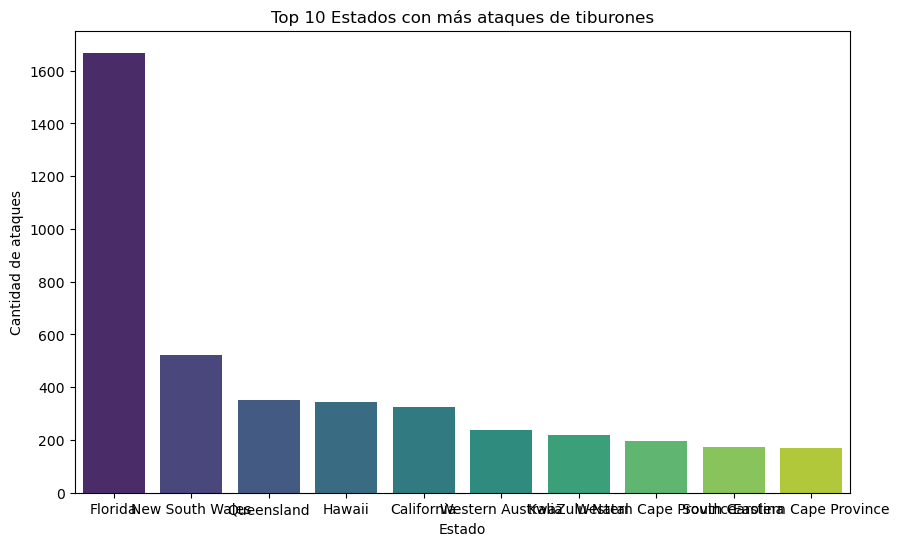

In [31]:
# Contar los estados más frecuentes
top_states = df['State'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")
plt.title('Top 10 Estados con más ataques de tiburones')
plt.xlabel('Estado')
plt.ylabel('Cantidad de ataques')
plt.show()


C:\Users\Propietario\AppData\Local\Temp\ipykernel_12240\540714075.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_species.index, y=top_species.values, palette="magma")


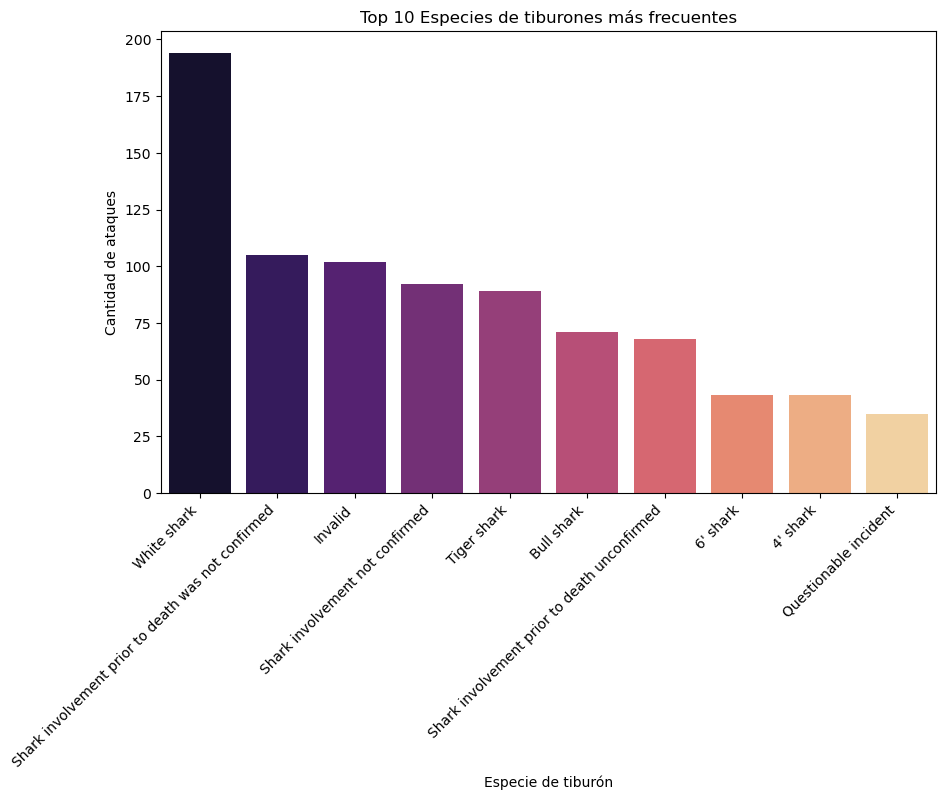

In [62]:
# Contar las especies más frecuentes
top_species = df[ultima_columna].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_species.index, y=top_species.values, palette="magma")
plt.title('Top 10 Especies de tiburones más frecuentes')
plt.xlabel('Especie de tiburón')
plt.ylabel('Cantidad de ataques')
plt.xticks(rotation=45, ha="right")
plt.show()


C:\Users\Propietario\AppData\Local\Temp\ipykernel_12240\2573587245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ataques_por_mes.index, y=ataques_por_mes.values, palette="coolwarm")


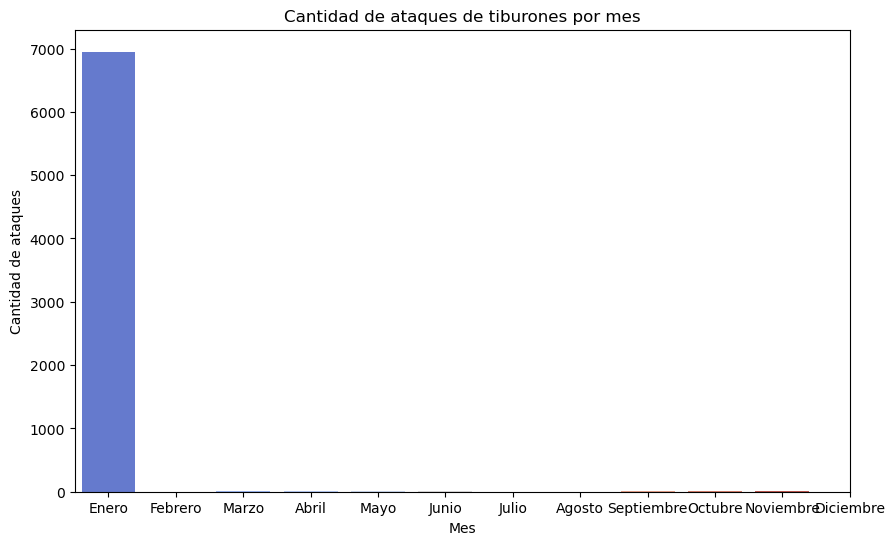

In [63]:
# Contar los ataques por mes
ataques_por_mes = df['Mes'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=ataques_por_mes.index, y=ataques_por_mes.values, palette="coolwarm")
plt.title('Cantidad de ataques de tiburones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de ataques')
plt.xticks(range(12), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.show()


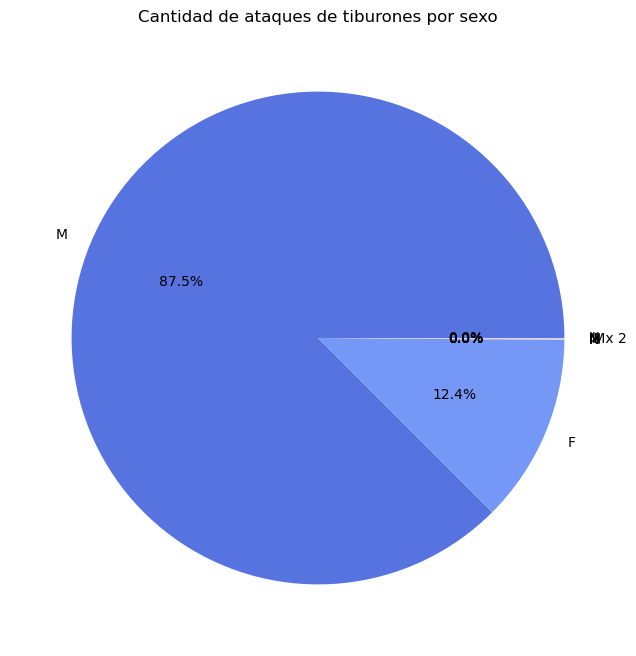

In [65]:
sex_counts = df['Sex'].value_counts().head(10)

# Paso 2: Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", 10))
plt.title('Cantidad de ataques de tiburones por sexo')
plt.show()

C:\Users\Propietario\AppData\Local\Temp\ipykernel_12240\319188100.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=country_counts.index, y=country_counts.values, palette=colors)


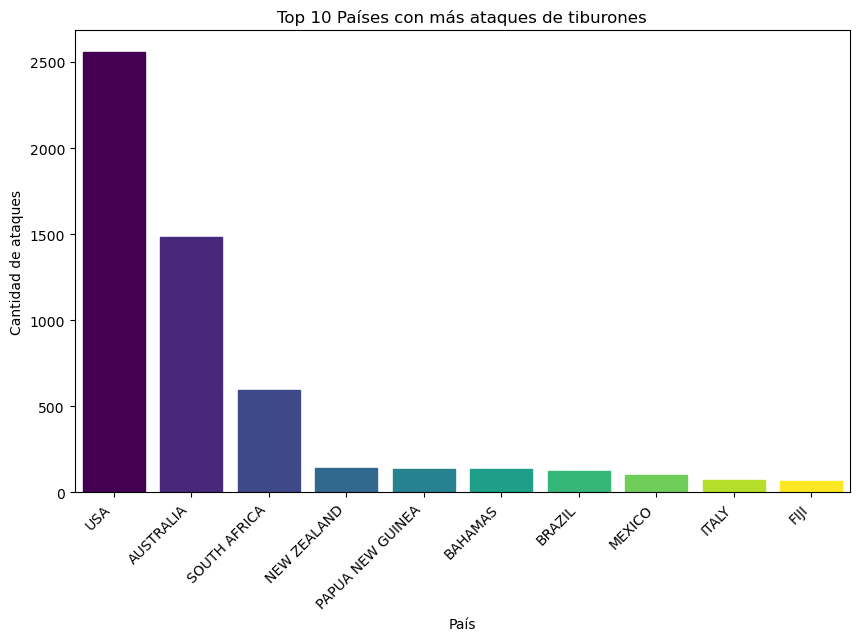

In [69]:

country_counts = df['Country'].value_counts().head(10)

# Paso 2: Crear el gráfico de barras con degradado
cmap = plt.get_cmap("viridis")
colors = [cmap(i) for i in np.linspace(0, 1, 10)]

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=country_counts.index, y=country_counts.values, palette=colors)
plt.title('Top 10 Países con más ataques de tiburones')
plt.xlabel('País')
plt.ylabel('Cantidad de ataques')

# Añadir el degradado a las barras
for bar, color in zip(bars.patches, colors):
    bar.set_color(color)

plt.xticks(rotation=45, ha="right")
plt.show()


C:\Users\Propietario\AppData\Local\Temp\ipykernel_4208\2188494571.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')


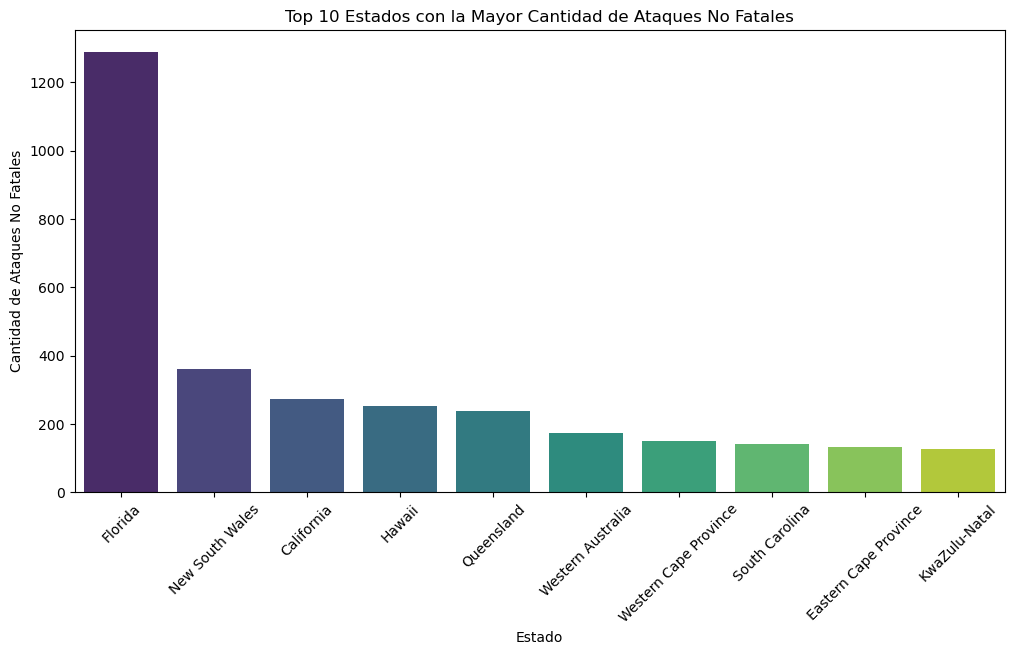

In [35]:
# Filtramos las filas que tienen valores 'N' en la columna 'Fatal Y/N'
no_fatal_df = df[df['Fatal Y/N'] == 'N']

# Contamos la cantidad de ocurrencias de cada estado
state_counts = no_fatal_df['State'].value_counts()

# Seleccionamos los 10 estados con más ataques no fatales
top_states = state_counts.head(10)

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')

plt.title('Top 10 Estados con la Mayor Cantidad de Ataques No Fatales')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Ataques No Fatales')
plt.xticks(rotation=45)
plt.show()
